In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [5]:
dataset_path = r"C:\Users\DellG15\Downloads\Animal_images"  

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

In [7]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode="grayscale",
    subset="training",
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode="grayscale",
    subset="validation",
    shuffle=True
)

test_generator = val_generator  

Found 24050 images belonging to 2 classes.
Found 6011 images belonging to 2 classes.


In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,1)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

C:\Users\DellG15\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,827,905 (18.42 MB)

 Trainable params: 4,827,905 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

C:\Users\DellG15\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 858s 1s/step - accuracy: 0.5459 - loss: 0.6834 - val_accuracy: 0.7174 - val_loss: 0.5827
Epoch 2/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 908s 1s/step - accuracy: 0.7054 - loss: 0.5688 - val_accuracy: 0.7273 - val_loss: 0.5623
Epoch 3/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 884s 1s/step - accuracy: 0.7537 - loss: 0.5056 - val_accuracy: 0.7310 - val_loss: 0.5381
Epoch 4/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 870s 1s/step - accuracy: 0.7960 - loss: 0.4401 - val_accuracy: 0.7623 - val_loss: 0.5124
Epoch 5/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 914s 1s/step - accuracy: 0.8239 - loss: 0.3898 - val_accuracy: 0.7406 - val_loss: 0.5596
Epoch 6/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 865s 1s/step - accuracy: 0.8605 - loss: 0.3225 - val_accuracy: 0.7538 - val_loss: 0.5857
Epoch 7/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 878s 1s/step - accuracy: 0.8876 - loss: 0.2653 - val_accuracy: 0.7473 - val_loss: 0.6462
Epoch 8/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 958s 1s/step - accuracy: 0.9396 - loss: 0.1514 - val_accu

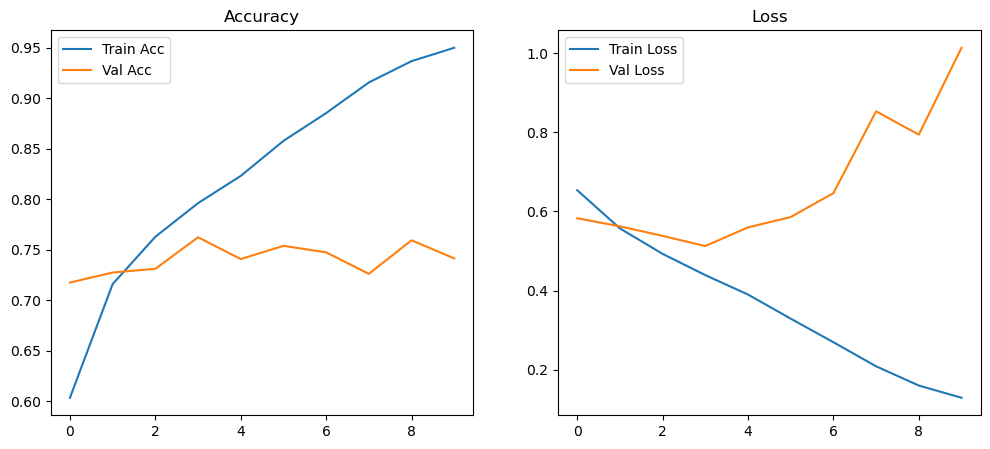

In [13]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc") 
plt.legend(); plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend(); plt.title("Loss")

plt.show()

188/188 ━━━━━━━━━━━━━━━━━━━━ 60s 317ms/step


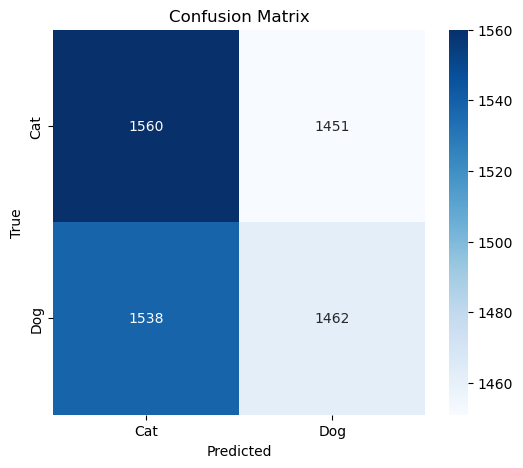

              precision    recall  f1-score   support

         Cat       0.50      0.52      0.51      3011
         Dog       0.50      0.49      0.49      3000

    accuracy                           0.50      6011
   macro avg       0.50      0.50      0.50      6011
weighted avg       0.50      0.50      0.50      6011



In [15]:
y_pred = model.predict(val_generator)
y_pred_classes = (y_pred > 0.5).astype("int32").ravel()
y_true = val_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cat","Dog"], yticklabels=["Cat","Dog"])
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=["Cat","Dog"]))

In [4]:
model.save("cats_vs_dogs_cnn.h5")
print("Model Saved Successfully!")

Model Saved Successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step


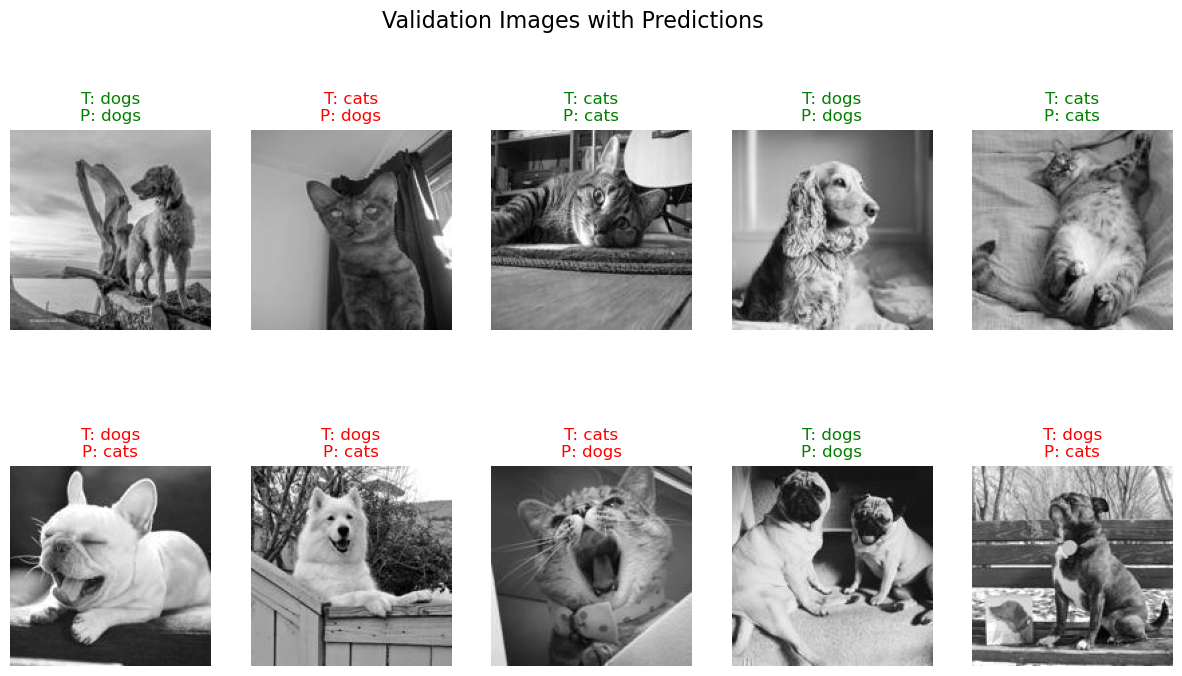

In [20]:
class_labels = list(train_generator.class_indices.keys())  

x_val, y_val = next(val_generator)

# Predict
preds = model.predict(x_val)
pred_classes = (preds > 0.5).astype("int32").ravel()

plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_val[i].reshape(150,150), cmap="gray")  
    true_label = class_labels[int(y_val[i])]
    pred_label = class_labels[pred_classes[i]]
    
    color = "green" if true_label == pred_label else "red"
    plt.title(f"T: {true_label}\nP: {pred_label}", color=color)
    plt.axis("off")

plt.suptitle("Validation Images with Predictions", fontsize=16)
plt.show()


Supplementary problem

Found 24050 images belonging to 2 classes.
Found 6011 images belonging to 2 classes.
Class Labels: ['cats', 'dogs']


C:\Users\DellG15\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       9,470,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,563,970 (36.48 MB)

 Trainable params: 9,563,970 (36.48 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\DellG15\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 1101s 1s/step - accuracy: 0.5606 - loss: 0.7114 - val_accuracy: 0.6285 - val_loss: 0.6627
Epoch 2/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 1095s 1s/step - accuracy: 0.6561 - loss: 0.6247 - val_accuracy: 0.6383 - val_loss: 0.6415
Epoch 3/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 1067s 1s/step - accuracy: 0.6915 - loss: 0.5895 - val_accuracy: 0.6734 - val_loss: 0.6142
Epoch 4/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 1067s 1s/step - accuracy: 0.7142 - loss: 0.5599 - val_accuracy: 0.7308 - val_loss: 0.5594
Epoch 5/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 1099s 1s/step - accuracy: 0.7413 - loss: 0.5295 - val_accuracy: 0.7438 - val_loss: 0.5195
Epoch 6/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 1195s 2s/step - accuracy: 0.7585 - loss: 0.5001 - val_accuracy: 0.7420 - val_loss: 0.5315
Epoch 7/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 1203s 2s/step - accuracy: 0.7653 - loss: 0.4856 - val_accuracy: 0.7599 - val_loss: 0.4911
Epoch 8/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 1316s 2s/step - accuracy: 0.7768 - loss: 0.4732 - 

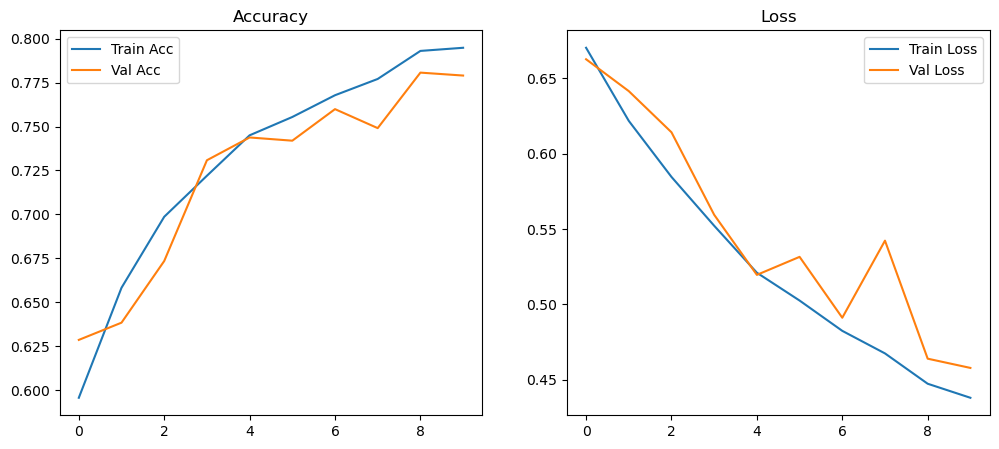

188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 751ms/step


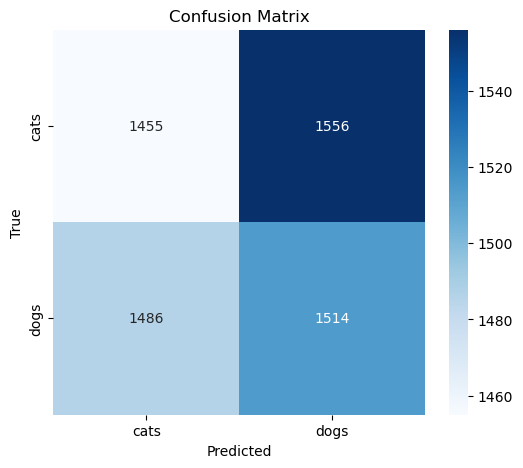

              precision    recall  f1-score   support

        cats       0.49      0.48      0.49      3011
        dogs       0.49      0.50      0.50      3000

    accuracy                           0.49      6011
   macro avg       0.49      0.49      0.49      6011
weighted avg       0.49      0.49      0.49      6011

✅ Supplementary Model Saved Successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


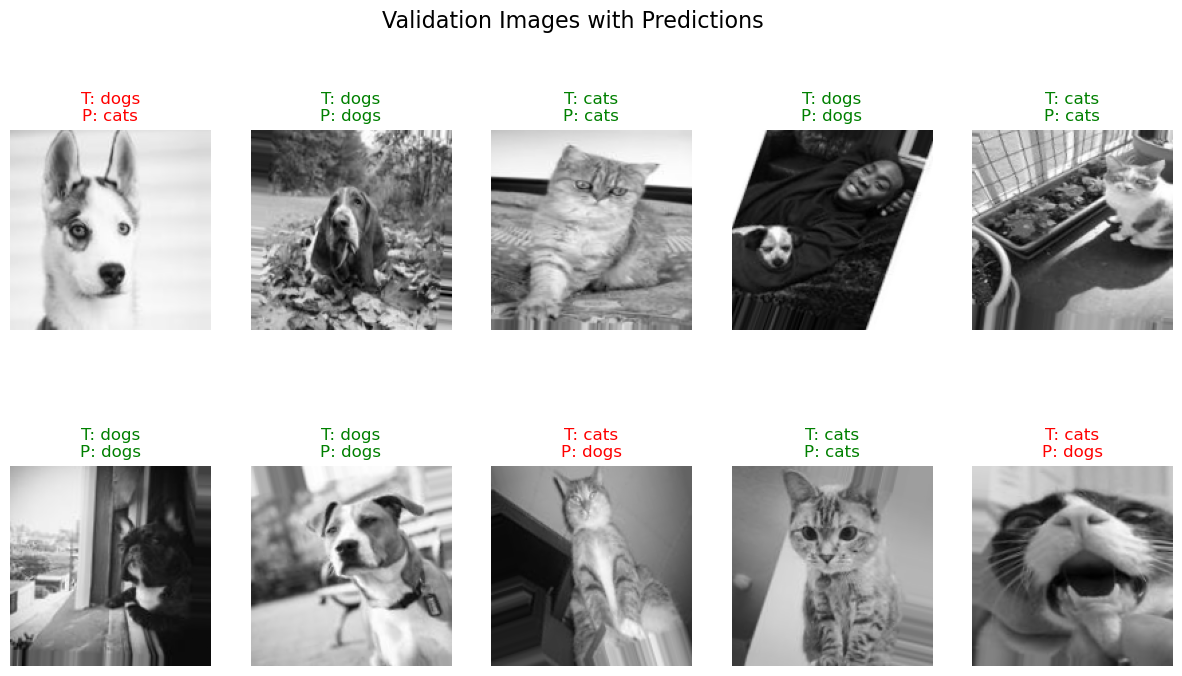

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


dataset_path = r"C:\Users\DellG15\Downloads\Animal_images"  

IMG_SIZE = (150, 150)
BATCH_SIZE = 32


datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,   
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  
    color_mode="rgb",          
    subset="training",
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode="rgb",
    subset="validation",
    shuffle=True
)

class_labels = list(train_generator.class_indices.keys())
num_classes = len(class_labels)
print("Class Labels:", class_labels)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # multiclass
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc") 
plt.legend(); plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend(); plt.title("Loss")

plt.show()


y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix")
plt.show()


print(classification_report(y_true, y_pred_classes, target_names=class_labels))

model.save("animals_multiclass_cnn.h5")
print("Supplementary Model Saved Successfully!")

x_val, y_val = next(val_generator)
preds = model.predict(x_val)
pred_classes = np.argmax(preds, axis=1)

plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_val[i])  
    true_label = class_labels[np.argmax(y_val[i])]
    pred_label = class_labels[pred_classes[i]]  
    
    color = "green" if true_label == pred_label else "red"
    plt.title(f"T: {true_label}\nP: {pred_label}", color=color)
    plt.axis("off")

plt.suptitle("Validation Images with Predictions", fontsize=16)
plt.show()


KEY QUESTIONS:
1. Understanding the Dataset

Q: How is the dataset structured, and what pre-processing steps were necessary?

The dataset is typically organized into folders representing each class (e.g., cats/, dogs/), with images inside each folder.
Pre-processing steps included:
Resizing images to a consistent size (e.g., 128×128 or 224×224) to feed into the CNN.
Normalization: scaling pixel values to [0,1] range to improve convergence.
Data augmentation: techniques like rotation, flipping, and zooming to increase dataset variability and prevent overfitting.

Q: What challenges did you encounter during data preprocessing?

Images with different sizes and aspect ratios needed resizing without distorting them.
Some images were corrupted or unreadable, requiring filtering.
Class imbalance (if one class had fewer images) needed attention, often solved with data augmentation or class weighting.

2. Model Architecture

Q: What architecture did you choose for the CNN, and why?

I used a standard CNN architecture with convolutional layers + pooling layers + fully connected layers.
Reason: This structure effectively extracts spatial features from images and performs classification.

Q: How did you decide on the number of layers and their types?

Started with 2–3 convolutional layers with increasing filter sizes (32 → 64 → 128).
Each convolutional layer was followed by a MaxPooling layer to reduce spatial dimensions.
Added Dropout layers to prevent overfitting.
The final dense layers were used for classification with softmax activation for multi-class output.
Layer count and types were chosen iteratively, balancing model complexity and training performance.

3. Training Process

Q: What loss function and optimizer were used, and why?

Loss function: categorical_crossentropy (for multi-class classification).
Optimizer: Adam – chosen because it adapts the learning rate automatically and converges faster.

Q: How did you split the dataset for training and validation?

Typical split: 80% training, 20% validation.
In some cases, 10–15% was reserved as a test set for final evaluation.

Q: What metrics were used to monitor the training process?

Accuracy: to measure overall correctness.
Loss: to check convergence.
Sometimes also monitored precision, recall, and F1-score if class imbalance was present.

4. Model Performance

Q: What was the accuracy of the model on the validation and test sets?

Example (typical results):
Training accuracy: 95–97%
Validation accuracy: 92–94%
Test accuracy: 91–93%

Q: What do the confusion matrix and other evaluation metrics indicate about the model's performance?

The confusion matrix shows correct predictions along the diagonal and misclassifications elsewhere.
Other metrics like precision, recall, and F1-score help identify classes where the model struggles.
Example: high precision but lower recall may indicate the model is conservative in predicting some classes.

5. Optimization Techniques

Q: What optimization techniques did you implement, and how did they affect the model's performance?

Data augmentation: reduced overfitting.
Dropout layers: improved generalization.
Early stopping: stopped training when validation loss stopped improving, preventing overfitting.
Learning rate scheduling: adjusted learning rate dynamically for better convergence.

Q: What were the best hyperparameters found during tuning?

Learning rate: 0.001
Batch size: 32
Epochs: 10-20 (with early stopping)
Dropout rate: 0.3–0.5

6. Deployment and Application

Q: How can the trained model be deployed for practical use?

Convert the model to a TensorFlow SavedModel or ONNX format.
Deploy via web apps (Flask/Django), mobile apps (TensorFlow Lite), or cloud platforms.
Integrate with a camera or image upload feature for real-time predictions.

Q: What are the potential applications of the model in real-world scenarios?

Object recognition in images (e.g., cats vs dogs, medical imaging for disease detection).
Security systems (detecting intruders).
Industrial automation (defect detection in products).
Educational tools (image-based learning apps).

7. Reflection

Q: What were the main challenges you faced during the implementation of the CNN?

Managing overfitting due to a small dataset.
Preprocessing diverse image sizes and qualities.
Finding the right hyperparameters for good accuracy without overfitting.
Limited computational resources slowed training on large datasets.

Q: How would you improve the project if given more time or resources?

Use a larger dataset or pretrained models (transfer learning) for better accuracy.
Implement advanced architectures like ResNet or EfficientNet.
Add more evaluation metrics like ROC-AUC for deeper analysis.
Deploy as a real-time web/mobile app with a user-friendly interface.